# Data Lake - U.S. Immigration Data

#### Data Engineering Capstone Project - Jonathan Cen

#### Project Summary
- A research center decides to study what U.S. cities are among the most popular destinations for immigrants such that they can propose a infrastucutre upgrade plan to the local governemnt.

The project follows the follow steps:
* Step 1: Scope the Project and Gather Data
* Step 2: Explore and Assess the Data
* Step 3: Define the Data Model
* Step 4: Run ETL to Model the Data
* Step 5: Complete Project Write Up

### Step 3: Define the Data Model
#### 3.1 Conceptual Data Model
Map out the conceptual data model and explain why you chose that model

In [5]:
# imports
import boto3
import os
import configparser
import pandas as pd

In [6]:
config = configparser.ConfigParser()
config.read('capstone.cfg')
os.environ['AWS_ACCESS_KEY_ID'] = config['AWS']['AWS_ACCESS_KEY_ID']
os.environ['AWS_SECRET_ACCESS_KEY'] = config['AWS']['AWS_SECRET_ACCESS_KEY']
session = boto3.session.Session(aws_access_key_id=os.environ['AWS_ACCESS_KEY_ID'], aws_secret_access_key=os.environ['AWS_SECRET_ACCESS_KEY'])
s3 = session.client(service_name="s3")

#### Step 3.1.1 - explore data in data lake

In [7]:
# Airports Code
airport_parquet = "s3://udacity-capstone-jc/data-lake/airport_codes"
df_airport_codes = pd.read_parquet(airport_parquet)
df_airport_codes.dropna(inplace=True)
df_airport_codes.head()

,ident,type,name,elevation_ft,continent,iso_country,municipality,gps_code,iata_code,local_code,longitude,latitude,state_code
13,PARS,small_airport,Russian Mission Airport,51.0,NA,US,Russian Mission,PARS,RSH,RSH,-161.319458,61.778885,AK
15,16K,seaplane_base,Port Alice Seaplane Base,0.0,NA,US,Port Alice,16K,PTC,16K,-133.597000,55.803000,AK
17,PASY,medium_airport,Eareckson Air Station,95.0,NA,US,Shemya,PASY,SYA,SYA,174.113998,52.712299,AK
20,PADE,medium_airport,Deering Airport,21.0,NA,US,Deering,PADE,DRG,DEE,-162.766006,66.069603,AK
21,PANW,small_airport,New Stuyahok Airport,364.0,NA,US,New Stuyahok,PANW,KNW,KNW,-157.328003,59.449902,AK


In [8]:
df_airport_codes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1909 entries, 13 to 22753
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   ident         1909 non-null   object  
 1   type          1909 non-null   object  
 2   name          1909 non-null   object  
 3   elevation_ft  1909 non-null   float64 
 4   continent     1909 non-null   object  
 5   iso_country   1909 non-null   object  
 6   municipality  1909 non-null   object  
 7   gps_code      1909 non-null   object  
 8   iata_code     1909 non-null   object  
 9   local_code    1909 non-null   object  
 10  longitude     1909 non-null   float64 
 11  latitude      1909 non-null   float64 
 12  state_code    1909 non-null   category
dtypes: category(1), float64(3), object(9)
memory usage: 198.2+ KB


In [9]:
# U.S. Immigration Data
immigration_parquet = "s3://udacity-capstone-jc/data-lake/us_immigration"
df_immigration = pd.read_parquet(immigration_parquet)
df_immigration.head()

,cicid,i94mon,i94cit,i94res,i94port,arrdate,i94mode,depdate,i94bir,i94visa,matflag,biryear,gender,airline,fltno,visatype,i94yr,i94addr
0,647547,4,PORTUGAL,PORTUGAL,"FORT LAUDERDALE, FL",20548,Air,20549,30,2,M,1986,M,NK,00756,WT,2016,AK
1,2072597,12,COLOMBIA,COLOMBIA,"MIAMI, FL",20799,Air,20820,7,2,M,2009,M,FC,352,B2,2016,AK
2,798007,4,DOMINICAN REPUBLIC,DOMINICAN REPUBLIC,"NEW YORK, NY",20548,Air,20578,62,2,M,1954,M,DL,00312,B2,2016,AK
3,2159547,12,COSTA RICA,COSTA RICA,"LOS ANGELES, CA",20799,Air,20803,39,2,M,1977,M,AS,283,B2,2016,AK
4,1224559,4,THAILAND,THAILAND,"SAN FRANCISCO, CA",20551,Air,20566,42,2,M,1974,F,CX,00892,B2,2016,AK


In [10]:
df_immigration.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27199864 entries, 0 to 27199863
Data columns (total 18 columns):
 #   Column    Dtype   
---  ------    -----   
 0   cicid     int32   
 1   i94mon    int32   
 2   i94cit    object  
 3   i94res    object  
 4   i94port   object  
 5   arrdate   int32   
 6   i94mode   object  
 7   depdate   int32   
 8   i94bir    int32   
 9   i94visa   int32   
 10  matflag   object  
 11  biryear   int32   
 12  gender    object  
 13  airline   object  
 14  fltno     object  
 15  visatype  object  
 16  i94yr     category
 17  i94addr   category
dtypes: category(2), int32(7), object(9)
memory usage: 2.6+ GB


In [11]:
# U.S. Cities Demographics
us_cities_demo_parquet = "s3://udacity-capstone-jc/data-lake/us_cities_demographics/"
df_us_cities = pd.read_parquet(us_cities_demo_parquet)
df_us_cities.head()

,city,state,median_age,male_population,female_population,total_population,num_of_veterans,foreign_born,average_household_size,race,count,state_code
0,Anchorage,Alaska,32.2,152945,145750,298695,27492,33258,2.77,Hispanic or Latino,27261,AK
1,Anchorage,Alaska,32.2,152945,145750,298695,27492,33258,2.77,American Indian and Alaska Native,36339,AK
2,Anchorage,Alaska,32.2,152945,145750,298695,27492,33258,2.77,White,212696,AK
3,Anchorage,Alaska,32.2,152945,145750,298695,27492,33258,2.77,Asian,36825,AK
4,Anchorage,Alaska,32.2,152945,145750,298695,27492,33258,2.77,Black or African-American,23107,AK


In [12]:
df_us_cities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2875 entries, 0 to 2874
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   city                    2875 non-null   object  
 1   state                   2875 non-null   object  
 2   median_age              2875 non-null   float64 
 3   male_population         2875 non-null   int32   
 4   female_population       2875 non-null   int32   
 5   total_population        2875 non-null   object  
 6   num_of_veterans         2875 non-null   int32   
 7   foreign_born            2875 non-null   int32   
 8   average_household_size  2875 non-null   float64 
 9   race                    2875 non-null   object  
 10  count                   2875 non-null   int32   
 11  state_code              2875 non-null   category
dtypes: category(1), float64(2), int32(5), object(4)
memory usage: 195.3+ KB


#### 3.1.2 staging tables
The data warehouse contains three staging tables to hold data from the data lake. These three staging tables will then enable SQL-SQL ETL.

<img  style="width:80%"  src="Data model - staging tables.jpg" alt="data model for staging tables">

#### 3.1.3 data warehouse schema (STAR schema)

Since this database is for analytical purposes, it should be optimized for <strong>Online Analytical Processing (OLAP)</strong>
workloads, and therefore, a <strong>STAR schema</strong> is recommended for this database.

<strong>Fact table - <code>immigration_records</code></strong>:
* Fact tables generally record events, and in this case, an immigrant entering the U.S. is an event and is a good candidate for the fact table
* For each immigrant, the fact table records the following information:
    * the immigrant's city or origin
    * the port that he/she enters in the U.S.
    * the transport which he/she used to arrive in the U.S.
    * the arrival date
    * the departure date
    * the gender of the immigrant
    * the state code he/she will be living in the U.S.

<strong>Dimension tables</strong>:
* Dimension tables records the context of an event (an immigrant enters the U.S.)
* <code>dim_airports</code>
    * The <code>dim_airports</code> dimension table contains:
        * the type of an airport
        * the name of an airport
        * the gps code of an airport
        * the longitude of an airport
        * the latitude of an airport
        * the state code of the airport
* <code>dim_travel</code>
    * The <code>dim_travel</code> dimension table contains:
        * the travel date of an immigrant (both arrival and departure)
        * the year of the date
        * the month of the date
        * the day of the date
        * the week of the date
        * the weekday of the date
* <code>dim_demographics</code>
    * The <code>dim_demographics</code> dimension table contains:
        * the state code of a state
        * the total male population in the state
        * the total female population in the stae
        * the total population in the state
        * the number of foreign born in the state



<img style="width:80%" src="Data model - data warehouse.jpg" alt="data model for data lake">

#### 3.2 Mapping Out Data Pipelines
Steps necessary to pipeline the data into the chosen data mode:
1. delete any existing tables in the data warehouse (for initial run only)
2. create any table if not exists
3. populate staging tables using the <code>copy</code> command
4. populate dimension tables via SQL-SQL ETL
5. populate fact table via SQL-SQL ETL

### Step 4: Run Pipelines to Model the Data 
#### 4.1 Create the data model
Build the data pipelines to create the data model.

#### 4.1.1 - create an Amazon Redshift cluster via <code>Infrastructure as code</code>
The following code cell creates an Amazon Redshift cluster - note, it could take a few minutes for the cluster to be ready.

In [ ]:
# from infra_as_code import get_role_arn, create_redshift_cluster, describe_redshift_cluster, prettyRedshiftProps
# roleArn = get_role_arn()
# create_redshift_cluster(roleArn)  # run this to create a redshift cluster.
# myClusterProps = describe_redshift_cluster()
# print(prettyRedshiftProps(myClusterProps))

#### 4.1.2 establish a redshift connection

In [13]:
import psycopg2
config = configparser.ConfigParser()
config.read('dwh-jc.cfg')
conn = psycopg2.connect("host={} dbname={} user={} password={} port={}".format(*config['CLUSTER'].values()))
cur = conn.cursor()

In [14]:
# helper function for executing queries

def execute_queries(query_list, cursor, connection):
    for query in query_list:
        cursor.execute(query)
        connection.commit()

#### 4.1.2 - drop tables if exist
This step drops any tables if they exist to ensure a clean environment - <strong>This step should NOT be run in production</strong>

In [15]:
from sql_queries import drop_table_queries

execute_queries(query_list=drop_table_queries, cursor=cur, connection=conn)

#### 4.1.3 - create tables
This steps creates all tables (3 staging tables, 1 fact table, and 3 dimensional tables)

In [16]:
from sql_queries import create_table_queries
execute_queries(query_list=create_table_queries, cursor=cur, connection=conn)

#### 4.1.4 - copy staging tables
This step populates the three staging tables from the data lake via the <code>COPY</code> command

In [17]:
from sql_queries import copy_table_queries
execute_queries(query_list=copy_table_queries, cursor=cur, connection=conn)

#### 4.1.5 - Quality Check for staging tables

Check staging tables have the correct number of records. If quality check failed, do not proceed with populating fact and dimensional tables

In [18]:
check_staging = ["SELECT COUNT(*) FROM immigration_staging",
                "SELECT COUNT(*) FROM airport_staging",
                "SELECT COUNT(*) FROM demographics_staging"]
answers = [27199864, 22741, 2875]

for i in range(len(check_staging)):
    cur.execute(check_staging[i])
    records = cur.fetchone()[0]
    if records != answers[i]:
        print(f"{check_staging[i].split()[-1]} failed quality check with {records} records")
    else:
        print(f"{check_staging[i].split()[-1]} passed quality check with {records} records.")


immigration_staging passed quality check with 27199864 records.
airport_staging failed quality check with 22753 records
demographics_staging passed quality check with 2875 records.


#### 4.1.6 - populate fact and dimensional tables
This steps populates the three dimensional tables and the fact table.

In [19]:
from sql_queries import insert_table_queries
execute_queries(query_list=insert_table_queries, cursor=cur, connection=conn)

#### 4.2 Data Quality Checks
Explain the data quality checks you'll perform to ensure the pipeline ran as expected. These could include:
 * Integrity constraints on the relational database (e.g., unique key, data type, etc.)
    - <span style="color:red">Primary key and foreign key constrants have been applied to the data warehouse</span>
    - <span style="color:red">Column data type constraints have been applied to the data warehouse</span>
 * Source/Count checks to ensure completeness
    - <span style="color:red">Source/count checks have been applied to both staging tables, fact table, and dimensional tables</span>
 
Run Quality Checks

In [20]:
def quality_check(table:str, expected_records:int):
    cur.execute(f""" SELECT count(*) from {table}""")
    records = cur.fetchone()[0]
    if records != expected_records:
        print(f"{table} failed quality check with {records} records")
    else:
        print(f"{table} passed quality check with {records} records.")

In [21]:
quality_check(table="fact_immigration_records", expected_records=27199864)
quality_check(table="dim_airports", expected_records=46)
quality_check(table="dim_travel", expected_records=554)
quality_check(table="dim_demographics", expected_records=48)

fact_immigration_records passed quality check with 27199864 records.
dim_airports passed quality check with 46 records.
dim_travel passed quality check with 554 records.
dim_demographics passed quality check with 48 records.


## Data Quality Check - ensure <code>air</code> mode is in the fact table
Since whether each state has enough large airports is the main research topic, it is essential to ensure the travel mode, air, is present in the <code>fact_immigration_records</code> table.

In [24]:
check_air_exist = """
    SELECT count(*) from fact_immigration_records where mode = 'Air'
"""

cur.execute(check_air_exist)
record = cur.fetchone()[0]
if record != 0:
    print(f"Passed quality check - there are {record} Air records in the fact_immigration_records table")
else:
    print(f"Failed quality check - there are {record} Air records in the fact_immigraction_records table")


Passed quality check - there are 27136588 Air records in the fact_immigration_records table


## Data Quality Check - foreign key constraints
#### The following foreign key constraints are applied in the <code>fact_immigration_records</code> table:
* <code>FOREIGN KEY (arrival_date) REFERENCES dim_travel(travel_date)</code>
* <code>FOREIGN KEY (departure_date) REFERENCES dim_travel(travel_date)</code>
* <code>FOREIGN KEY (state_code) REFERENCES dim_demographics(state_code)</code>
* <code>FOREIGN KEY (state_code) REFERENCES dim_airports(airport_state_code)</code>

<span style="color:red">In the fact_immigraction_records table, these fields (arrival_date, departure_date, state_code) all have the same data type and <code>NOT NULL</code> constraint as the dimension tables that they are referencing.</span>

<strong>Delete the Amazon Redshift cluster to save cost</strong>

In [ ]:
# from infra_as_code import delete_redshift_cluster
# delete_redshift_cluster()

#### 4.3 Data dictionary 
Create a data dictionary for your data model. For each field, provide a brief description of what the data is and where it came from. You can include the data dictionary in the notebook or in a separate file.

<span style="color:blue">Data Dictionaries for the fact table and all dimensional tables are available in the workspace in <code>.xlsx</code> format:</span>
- <span style="color:blue"><code>data_dictionary_dim_airport.xlsx</code></span>
- <span style="color:blue"><code>data_dictionary_dim_demographics.xlsx</code></span>
- <span style="color:blue"><code>data_dictionary_dim_travel.xlsx</code></span>
- <span style="color:blue"><code>data_dictionary_fact_immigration.xlsx</code></span>

#### Step 5: Project Write Up
* Clearly state the rationale for the choice of tools and technologies for the project:
    * Apache Spark:
        * Apache Spark is chosen for ingestions as it allows a large volume of data (over 22 millon records) to be ingested in parallel.
    * AWS S3:
        * AWS S3 is chosen for the data lake as it allows a large volume of data being stored at a very low price, and it integrates with the other Amazon Web Services very well.
    * Apache Parquet:
        * Apache Parquet is chosen as the storage format as it allows data to be paritioned by columns.
    * Amazon Redshift:
        * Amazon Redshift is chosen as the cloud data warehouse as it is highly available and highly performant.
* Propose how often the data should be updated and why:
    * The data (especially the fact table) should be updated daily as travelers are coming to the U.S. on a daily basis, it is essential that the most up-to-date data are available in the data warehouse to enable quality decisions.


* Write a description of how you would approach the problem differently under the following scenarios:
    * The data was increased by 100x.
        * If the data was increased by 100 times, the current apache spark jobs shall be submitted to an AWS EMR cluster for processing instead of on a local machine
    * The data populates a dashboard that must be updated on a daily basis by 7am every day.
        * Apache Airflow shall be used to schedule all data ingestion tasks and ETL tasks to be completed before 7 am
    * The database needed to be accessed by 100+ people.
        * The Amazon Redshift Data Warehouse should have <strong>Elastic Resize</strong> enabled.

### Other requirements in the project rubric
* At least 2 data sources:
    - <span style="color:blue">Three data sources are used in this project</span>
* More than 1 million lines of data:
    - <span style="color:blue">The U.S. Immigration dataset contains over 22 million lines of data</span>
    - <span style="color:blue">The fact table also contains <strong>27199864<strong> records</span>
* At least two data formats (csv, api, json)
    - <span style="color:blue">The U.S. Immigraction dataset is of the format <code>.sas7bdat</code></span>
    - <span style="color:blue">The U.S. City Demographic dataset and the Airport Code dataset are of the format <code>.csv</code></span>

# Example Usage

### The question: do we have enough large airports in states where large amount of traveller are living?

In [25]:
query = """SELECT 
            count(*) as num_of_people_arriving, 
            state_code, 
            num_large_airports 
        FROM 
            fact_immigration_records f JOIN dim_airports a ON (a.airport_state_code = f.state_code) 
        GROUP BY 
            state_code, num_large_airports
    """

In [26]:
cur.execute(query)
result = cur.fetchall()

In [27]:
people = []
state = []
large_airports = []
for current in result:
    people.append(round(current[0]/10**6, 3))  # convert to millions of people
    state.append(current[1])
    large_airports.append(current[2])

print(people)
print(state)
print(large_airports)

[0.288, 0.063, 0.018, 0.026, 0.205, 0.027, 0.077, 0.054, 1.097, 4.606, 0.092, 0.162, 0.13, 0.015, 0.013, 0.698, 6.564, 0.099, 0.027, 0.182, 0.063, 0.042, 4.895, 0.227, 0.748, 0.032, 0.311, 0.224, 0.028, 1.751, 1.213, 0.258, 0.419, 0.029, 0.02, 0.684, 0.286, 0.126, 0.235, 0.159, 0.202, 0.008, 0.111, 0.095, 0.058]
['PA', 'MO', 'NM', 'AR', 'NE', 'KS', 'WI', 'AK', 'NV', 'CA', 'IN', 'LA', 'CT', 'MS', 'MT', 'MA', 'FL', 'TN', 'ME', 'AZ', 'SC', 'KY', 'NY', 'MD', 'IL', 'IA', 'GA', 'CO', 'DE', 'HI', 'TX', 'DC', 'WA', 'OK', 'ID', 'NJ', 'VA', 'OR', 'MI', 'OH', 'NC', 'WV', 'MN', 'UT', 'AL']
[3, 6, 3, 2, 1, 1, 3, 2, 2, 12, 4, 4, 1, 3, 1, 1, 14, 5, 2, 3, 4, 3, 7, 2, 8, 4, 5, 1, 1, 1, 15, 2, 5, 5, 2, 1, 5, 1, 2, 6, 5, 2, 4, 1, 4]


In [28]:
import matplotlib.pyplot as plt
import numpy as np

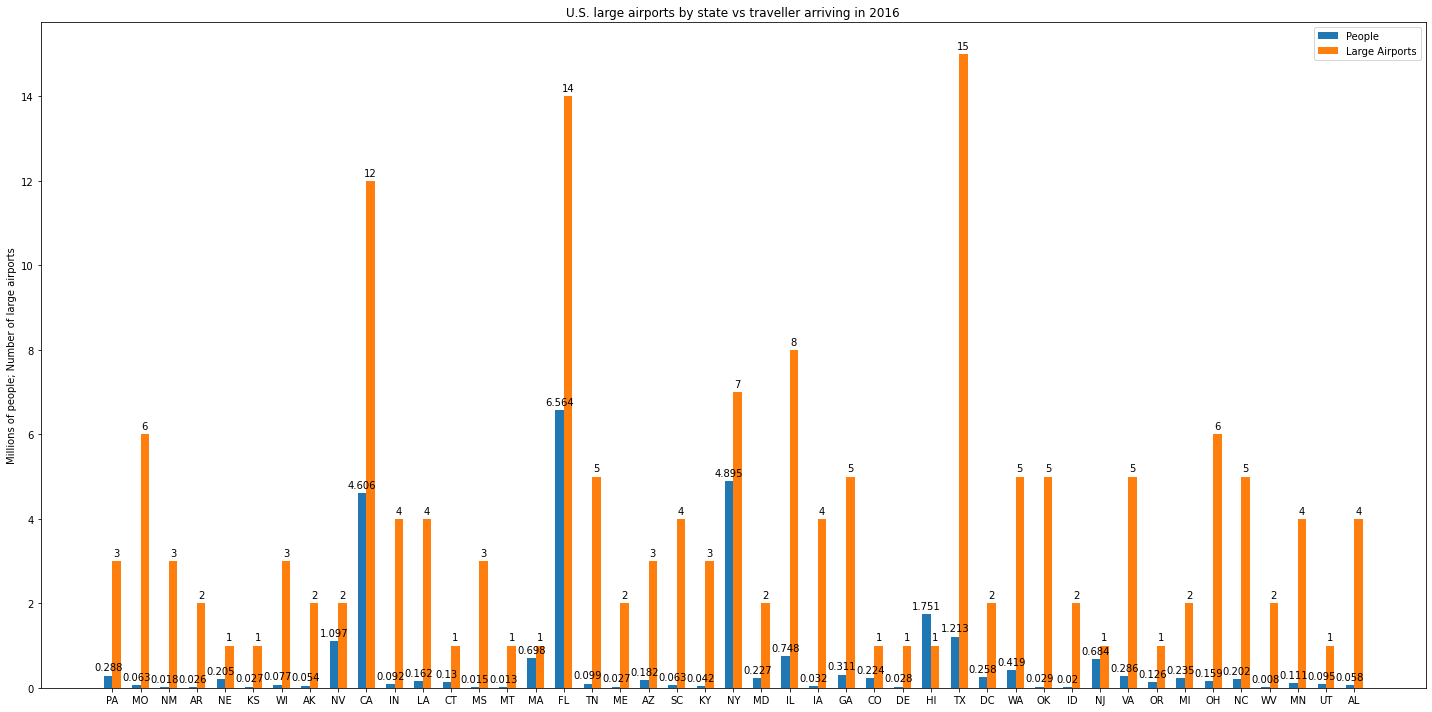

In [29]:
x = np.arange(len(people))
width = 0.3
fig, ax = plt.subplots(figsize=(20, 10))
rects1 = ax.bar(x - width/2, people, width, label='People')
rects2 = ax.bar(x + width/2, large_airports, width, label='Large Airports')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Millions of people; Number of large airports')
ax.set_title('U.S. large airports by state vs traveller arriving in 2016')
ax.set_xticks(x)
ax.set_xticklabels(state)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
fig.tight_layout()
plt.show()


#### Sample Insight:
* States such as Maryland, New York would need to consider adding more large airports given how many travelers are living their states